# 1D premixed laminar methane-air flame

Mechanism: GRI 3.0

Inflow conditions: T = 300K, p = 1 atm, stoichiometric coefficient = 1

In [69]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
from labellines import labelLines # for labels in species plot

In [70]:
gas = ct.Solution('gri30.xml', 'gri30_mix')

m = gas.n_species
stoich_O2 = gas.n_atoms('CH4','C') + 0.25*gas.n_atoms('CH4','H')
air_N2_O2_ratio = 3.76

# Set state of the unburned gas (on the left)
T = 300.0
phi = 1.0 # stioch ratio
X = {'CH4':phi, 'O2':stoich_O2, 'N2':stoich_O2*air_N2_O2_ratio}
gas.TPX = T, 101325.0, X #ct.one_atm
gas()

# grid = np.linspace(0,0.003,200)
# f = ct.FreeFlame(gas, grid=grid)

f = ct.FreeFlame(gas, width=0.003)
f.inlet.X = X
f.inlet.T = T

gas2 = gas


  gri30_mix:

       temperature   300 K
          pressure   1.0133e+05 Pa
           density   1.1225 kg/m^3
  mean mol. weight   27.633 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy       -2.5459e+05       -7.0351e+06  J
   internal energy       -3.4485e+05       -9.5295e+06  J
           entropy            7247.7        2.0028e+05  J/K
    Gibbs function       -2.4289e+06       -6.7119e+07  J
 heat capacity c_p            1077.3             29770  J/K
 heat capacity c_v            776.45             21456  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                O2           0.22014           0.19011           -26.334
               CH4          0.055187          0.095057           -54.676
                N2           0.72467           0.71483           -23.

In [71]:
gas2.equilibrate('TP')
gas2()


  gri30_mix:

       temperature   300 K
          pressure   1.0133e+05 Pa
           density   1.1225 kg/m^3
  mean mol. weight   27.633 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy       -3.0153e+06       -8.3322e+07  J
   internal energy       -3.1055e+06       -8.5816e+07  J
           entropy            7229.9        1.9979e+05  J/K
    Gibbs function       -5.1842e+06       -1.4326e+08  J
 heat capacity c_p            1111.3             30709  J/K
 heat capacity c_v            810.41             22394  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
               H2O           0.12394           0.19011           -121.32
               CO2           0.15139          0.095057           -185.83
                N2           0.72467           0.71483           -23.

In [72]:
f.set_refine_criteria(ratio=3.0, slope=0.07, curve=0.14)
f.solve(loglevel=0, refine_grid=True)
print(f.grid.size)

f.energy_enabled = True
f.set_refine_criteria(ratio=2.0, slope=0.04, curve=0.1)
f.solve(loglevel=0, refine_grid=True)
print(f.grid.size)

137
232


/home/enson/.local/lib/python3.10/site-packages/labellines/core.py:148: UserWarning: Tried to label line Line2D(_child1), but could not find a label for it.
  warnings.warn(
/home/enson/.local/lib/python3.10/site-packages/labellines/core.py:148: UserWarning: Tried to label line Line2D(_child3), but could not find a label for it.
  warnings.warn(
/home/enson/.local/lib/python3.10/site-packages/labellines/core.py:148: UserWarning: Tried to label line Line2D(_child5), but could not find a label for it.
  warnings.warn(
/home/enson/.local/lib/python3.10/site-packages/labellines/core.py:148: UserWarning: Tried to label line Line2D(_child7), but could not find a label for it.
  warnings.warn(
/home/enson/.local/lib/python3.10/site-packages/labellines/core.py:148: UserWarning: Tried to label line Line2D(_child9), but could not find a label for it.
  warnings.warn(
/home/enson/.local/lib/python3.10/site-packages/labellines/core.py:148: UserWarning: Tried to label line Line2D(_child1), but coul

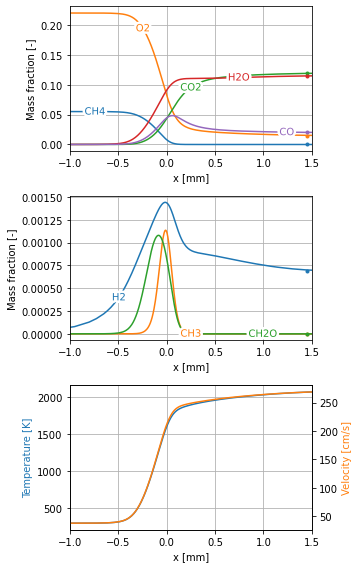

In [73]:
major_species = ['CH4', 'O2', 'CO2', 'H2O', 'CO']
minor_species = ['H2', 'CH3', 'CH2O']
grid = f.grid*1000-1.25
xlim = [-1, 1.5]
right_point = grid[np.where(grid<=xlim[1])[0][-1]]

fig, ax = plt.subplots(3, figsize=(5,8))
# Plot major species
i = int(0)
for sp in major_species:
  ax[0].plot(grid, f.Y[gas.species_index(sp)], label=sp, color=f"C{i}")
  ax[0].plot(right_point, gas2.Y[gas.species_index(sp)], '.', color=f"C{i}")
  i += 1
labelLines(ax[0].get_lines(), align=False)

ax[0].set_xlabel('x [mm]')
ax[0].set_ylabel('Mass fraction [-]')
ax[0].set_xlim(xlim)
ax[0].grid(which='major')

# Plot minor species
i = int(0)
for sp in minor_species:
  ax[1].plot(grid, f.Y[gas.species_index(sp)], label=sp, color=f"C{i}")
  ax[1].plot(right_point, gas2.Y[gas.species_index(sp)], '.', color=f"C{i}")
  i += 1
labelLines(ax[1].get_lines(), align=False)

ax[1].set_xlabel('x [mm]')
ax[1].set_ylabel('Mass fraction [-]')
ax[1].set_xlim(xlim)
ax[1].grid(which='major')

# Plot temperature
ax[2].plot(grid, f.T, color='C0')
ax[2].set_xlabel('x [mm]')
ax[2].set_ylabel('Temperature [K]', color='C0')
ax[2].set_xlim(xlim)
ax[2].grid(which='major')

ax2 = ax[2].twinx()
ax2.plot(grid, f.velocity*100, color='C1')
ax2.set_ylabel('Velocity [cm/s]', color='C1')

plt.tight_layout()


In [74]:
print("T(burnt) = ", f.T[-1])
print("rho(unburnt) = ", f.density[0], "rho(burnt) = ", f.density[-1])
print("vel(unburnt) = ", f.velocity[0], "vel(burnt) = ", f.velocity[-1])
print("int_energy(unburnt) = ", f.int_energy[0], "int_energy(burnt) = ", f.int_energy[-1])

T(burnt) =  2077.3674796042046
rho(unburnt) =  1.1220692645119497 rho(burnt) =  0.158936928307581
vel(unburnt) =  0.38103032815126364 vel(burnt) =  2.6900131049297897
int_energy(unburnt) =  -344913.69742286915 int_energy(burnt) =  -890656.7590928635
